<a href="https://colab.research.google.com/github/RodrigoMarenda/Sports_Predictions/blob/main/notebooks/Sports_Predctions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">Previsões de Partidas de Futebol Baseadas em Resultados Históricos</p>

![Previsões de Partidas de Futebol Baseadas em Resultados Históricos](https://github.com/RodrigoMarenda/Sports_Predictions/blob/main/Imagens/Crystal_Ball.jpeg?raw=true)

# **Introdução**

### **Definição do Problema:**

O mercado de ações é um ambiente complexo e dinâmico, onde o valor das ações pode flutuar significativamente devido a diversos fatores. A análise de ações é a prática de avaliar empresas e determinar o valor intrínseco de suas ações. Essa avaliação é crucial para tomar decisões de investimento informadas e potencialmente lucrativas.


- **Objetivo:**

Este projeto visa desenvolver um modelo para prever o valor de ações por meio da análise de indicadores financeiros. Utilizando dados históricos coletados do site Status Invest, o modelo será treinado para reconhecer padrões e, assim, prever se uma ação está sendo negociada abaixo (barata), acima (cara) ou em linha (neutra) com seu valor intrínseco. Essas previsões podem auxiliar os investidores a decidir se devem comprar, vender, manter ou não fazer nada com ações de empresas específicas.


- **Descrição do Problema:**

A principal dificuldade em prever o valor de ações reside na complexa interação de diversos fatores que influenciam o mercado. O objetivo do projeto é encontrar um modelo que capture as principais características e relações entre os indicadores financeiros para realizar previsões precisas.

- **Tipo de Problema**

Este é um problema de **classificação supervisionada**, onde o modelo aprenderá a associar os atributos das ações a uma classe (barata, cara, neutra). Além disso, no tratamento dos dados, será adicionada uma **coluna alvo** contendo essas categorias, o que define o caráter supervisionado do problema.

- **Premissas e Hipóteses:**

  - **Premissa**: Os indicadores financeiros de uma empresa refletem sua saúde financeira e, portanto, influenciam o valor de suas ações.
  - **Hipótese**: Um modelo de machine learning treinado com dados históricos de indicadores financeiros pode identificar padrões que ajudem a prever se uma ação está subvalorizada, sobrevalorizada ou adequadamente precificada.

- **Restrições e Condições:**

  - **Restrição**: Os dados utilizados para treinar o modelo foram obtidos exclusivamente do site Status Invest.
  - **Condição**: O modelo será aplicado apenas a ações para as quais há histórico de indicadores financeiros disponíveis no site.

Essas alterações fornecem uma explicação mais clara e precisa das premissas do projeto e das condições sob as quais o modelo será desenvolvido e aplicado.

  OBS: Encontrar dados de outras fontes tem sido desafiador. Enquanto é relativamente fácil encontrar o histórico de preços das ações, o mesmo não se aplica aos indicadores financeiros, que até o momento só foram encontrados no site Status Invest. Além disso, os indicadores estão disponíveis apenas em uma base anual. Para contornar essa limitação e garantir uma quantidade adequada de dados, foram utilizados os indicadores financeiros de várias empresas.


- **Descrição do dataset:**

Cada entrada no dataset corresponde a uma empresa em um determinado ano, identificada pelo código do Ticker, com informações do preço médio da ação no ano seguinte (PrecoAnoSeguinte) e no ano atual (PrecoAnoAtual). O atributo Alvo indica se a ação é considerada Barata (quando o preço médio do ano seguinte é 15% maior que o preço médio do ano atual), Cara (quando o preço médio do ano seguinte é 15% menor que o preço médio do ano atual) ou Neutra (quando o preço médio do ano seguinte está dentro de uma faixa de 15% para mais ou para menos).
  

## **Estrutura do projeto:**

[**1. Importação das Bibliotecas:**](#1)

[**2. Carregamento dos Dados:**](#2)

[**3. Pré-processamento de dados:**](#3)

[**4. Análise da Distribuição dos Dados:**](#4)

[**5. Escolha do algoritmo:**](#5)

[**6. Otimização do modelo:**](#6)

[**7. Valiação dos resultados:**](#7)

[**8. Conclusão:**](#8)


Explicação das Etapas
Pré-processamento de Dados:

Limpeza, transformação e divisão em conjuntos de treino e teste.
Padronização dos dados para melhorar o desempenho de alguns algoritmos.
Análise da Distribuição dos Dados:

Visualizações que ajudam a entender a distribuição dos dados e a correlação entre variáveis.
Escolha do Algoritmo:

Um modelo inicial é escolhido (nesse caso, o RandomForestClassifier), e ele é treinado com os dados de treino.
Otimização do Modelo:

Busca por hiperparâmetros usando GridSearchCV para encontrar a combinação de parâmetros que maximiza a acurácia.
Avaliação dos Resultados:

Geração de previsões, cálculo de acurácia, e exibição de métricas e visualizações de desempenho.
Essa estrutura facilita ajustes, novos testes e análise de resultados ao longo do projeto.











ChatGPT p


<a id="1"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">1. Importação das Bibliotecas</p>


In [9]:
# Imports das Bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
import os
import random

from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.preprocessing import LabelEncoder
from sklearn.exceptions import UndefinedMetricWarning
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import Normalizer
from joblib import dump
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Configuração para não exibir os warnings
warnings.filterwarnings("ignore")


<a id="1"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">2. Carregamento dos Dados</p>

Esse dataset foi obtido no Site Base de Dados.Org. Foram coletados das partidas de futebol realizadas desde 2013 até o ano de 2024, com o objetivo de realizar a predição de resultados de jogos de futebol.



In [10]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/RodrigoMarenda/Sports_Predictions/refs/heads/main/data/Dados_Brasileirao.csv"

# Lê o arquivo e exibe as primeiras linhas
df = pd.read_csv(url, delimiter=',')


# Exibir as primeiras linhas do DataFra
df.head()



,ano_campeonato,data,rodada,estadio,arbitro,publico,publico_max,time_mandante,time_visitante,tecnico_mandante,...,chutes_bola_parada_mandante,chutes_bola_parada_visitante,defesas_mandante,defesas_visitante,impedimentos_mandante,impedimentos_visitante,chutes_mandante,chutes_visitante,chutes_fora_mandante,chutes_fora_visitante
0,2013,2013-12-01,37,Estádio Moisés Lucarelli,Márcio Chagas da Silva,2390.0,19728.0,Ponte Preta,Portuguesa,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013,2013-11-24,36,Estádio Paulo Constantino,Francisco Carlos do Nascimento,4369.0,20000.0,Santos FC,Fluminense,Claudinei Oliveira,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013,2013-11-24,36,Arena Fonte Nova,Ricardo Marques Ribeiro,31025.0,55000.0,EC Bahia,Portuguesa,Cristóvão Borges,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013,2013-05-26,1,Estádio Nacional de Brasília Mané Garrincha,Wilton Sampaio,63501.0,72788.0,Santos FC,Flamengo,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013,2013-05-30,2,Estádio Municipal Radialista Mário Helênio,Jean Pierre Goncalves Lima,8932.0,NaN,Flamengo,Ponte Preta,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Verificando o tamanho do dataset , total de linhas e colunas.
df.shape
print(f"O Dataset tem {df.shape[0]} linhas e {df.shape[1]} colunas.")

O Dataset tem 8402 linhas e 35 colunas.


In [11]:
# Verificando a extrutura do dataset, datatypes das colunas
df.dtypes

,0
ano_campeonato,int64
data,object
rodada,int64
estadio,object
arbitro,object
publico,float64
publico_max,float64
time_mandante,object
time_visitante,object
tecnico_mandante,object


Os tipos de dados estão corretos. Na proxima etapa vamos fazer as trativas de ETL dos dados.

<a id="1"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">3. Pré-processamento de dados:</p>


Nessa etapa será realizado a limpeza, transformação e divisão em conjuntos de treino e teste. Também faremos a padronização dos dados para melhorar o desempenho de alguns algoritmos.

In [12]:
# Preparação dos dados


# Removendo algumas colunas do DataFrame
colunas_para_remover = ['arbitro', 'gols_1_tempo_mandante','gols_1_tempo_visitante','escanteios_mandante','escanteios_visitante','faltas_mandante',
'faltas_visitante','chutes_bola_parada_mandante','chutes_bola_parada_visitante','defesas_mandante','defesas_visitante','impedimentos_mandante','impedimentos_visitante','chutes_mandante','chutes_visitante',
'chutes_fora_mandante','chutes_fora_visitante']

df_selecionado = df.drop(columns=colunas_para_remover)


# Exibindo as primeiras linhas do DataFrame com as colunas removidas
df_selecionado.head()


# Verificando se existem valores ausentes no dataset
print(df_selecionado.isnull().sum())


# Verificando o tamanho do dataset , total de linhas e colunas.
df_selecionado.shape
print(f"O Dataset tem {df_selecionado.shape[0]} linhas e {df_selecionado.shape[1]} colunas.")



ano_campeonato                       0
data                                 0
rodada                               0
estadio                             11
publico                           1711
publico_max                       4271
time_mandante                        0
time_visitante                       0
tecnico_mandante                  2154
tecnico_visitante                 2154
colocacao_mandante                1710
colocacao_visitante               1710
valor_equipe_titular_mandante     2098
valor_equipe_titular_visitante    2098
idade_media_titular_mandante      2100
idade_media_titular_visitante     2100
gols_mandante                        3
gols_visitante                       3
dtype: int64
O Dataset tem 8402 linhas e 18 colunas.


Iniciando Tratativa para Valores ausentes em cada linha e coluna.

Para tratar os Valores nulos, foram adotadas algumas regras de acordo com cada tipo de dado, de forma que essas atribuições de valores não geracem impacto de tendencia para a analise.  


In [15]:


# Tratativa para Valores ausentes
# Loop para verificar e substituir valores nulos em cada coluna
for index, row in df_selecionado.iterrows():

    # estadio                             11
    if pd.isnull(row['estadio']):  # Verificando se o valor da coluna 'estadio' é nulo
        df_selecionado.at[index, 'estadio'] = 'Desconhecido'  # Substituindo por um valor


    #publico                           1711
    if pd.isnull(row['publico']):  # Verificando se o valor da coluna 'publico' é nulo
        df_selecionado.at[index, 'publico'] = 1000  # Substituindo por valor publico minimo


    #publico_max                       4271
    if pd.isnull(row['publico_max']):  # Verificando se o valor da coluna 'publico_max' é nulo
        df_selecionado.at[index, 'publico_max'] = 1000  # Substituindo por valor publico max

    #tecnico_mandante                       2154
    if pd.isnull(row['tecnico_mandante']):  # Verificando se o valor da coluna 'tecnico_mandante' é nulo
        df_selecionado.at[index, 'tecnico_mandante']  = 'Desconhecido'  # Substituindo por valor

    #tecnico_visitante                       2154
    if pd.isnull(row['tecnico_visitante']):  # Verificando se o valor da coluna 'tecnico_visitante' é nulo
        df_selecionado.at[index, 'tecnico_visitante']  = 'Desconhecido'  # Substituindo por valor

    ##colocacao_mandante                1710
    if pd.isnull(row['colocacao_mandante']):  # Verificando se o valor da coluna 'colocacao_mandante' é nulo
        df_selecionado.at[index, 'colocacao_mandante']  = 0  # Substituindo por valor zero

    ##colocacao_visitante               1710
    if pd.isnull(row['colocacao_visitante']):  # Verificando se o valor da coluna 'colocacao_visitante' é nulo
        df_selecionado.at[index, 'colocacao_visitante']  = 0  # Substituindo por valor zero

    #valor_equipe_titular_mandante     2098
    if pd.isnull(row['valor_equipe_titular_mandante']):  # Verificando se o valor da coluna 'valor_equipe_titular_mandante' é nulo
        df_selecionado.at[index, 'valor_equipe_titular_mandante']  = 50000  # Substituindo por valor minimo

    #valor_equipe_titular_visitante     2098
    if pd.isnull(row['valor_equipe_titular_visitante']):  # Verificando se o valor da coluna 'valor_equipe_titular_visitante' é nulo
        df_selecionado.at[index, 'valor_equipe_titular_visitante']  = 50000  # Substituindo por valor  minimo

    #idade_media_titular_mandante     2100
    if pd.isnull(row['idade_media_titular_mandante']):  # Verificando se o valor da coluna 'idade_media_titular_mandante' é nulo
        df_selecionado.at[index, 'idade_media_titular_mandante']  = 30  # Substituindo por valor medio

    #idade_media_titular_visitante     2100
    if pd.isnull(row['idade_media_titular_visitante']):  # Verificando se o valor da coluna 'idade_media_titular_visitante' é nulo
        df_selecionado.at[index, 'idade_media_titular_visitante']  = 30  # Substituindo por valor medio

    #gols_mandante                     3
    if pd.isnull(row['gols_mandante']):  # Verificando se o valor da coluna 'gols_mandante' é nulo
        df_selecionado.at[index, 'gols_mandante']  = 0  # Substituindo por valor zero

    #gols_visitante                    3
    if pd.isnull(row['gols_visitante']):  # Verificando se o valor da coluna 'gols_visitante' é nulo
        df_selecionado.at[index, 'gols_visitante']  = 0  # Substituindo por valor zero


df_selecionado.head()

# Verificando se existem valores ausentes no dataset
print(df_selecionado.isnull().sum())




ano_campeonato                    0
data                              0
rodada                            0
estadio                           0
publico                           0
publico_max                       0
time_mandante                     0
time_visitante                    0
tecnico_mandante                  0
tecnico_visitante                 0
colocacao_mandante                0
colocacao_visitante               0
valor_equipe_titular_mandante     0
valor_equipe_titular_visitante    0
idade_media_titular_mandante      0
idade_media_titular_visitante     0
gols_mandante                     0
gols_visitante                    0
resultado                         0
dtype: int64


Inicando Tratamentos de Divisão dos Dados

In [14]:
# Codificando variáveis categóricas para valores numéricos (Label Encoding)
label_encoder = LabelEncoder()

df_selecionado['time_mandante'] = label_encoder.fit_transform(df_selecionado['time_mandante'])
df_selecionado['time_visitante'] = label_encoder.fit_transform(df_selecionado['time_visitante'])
df_selecionado['estadio'] = label_encoder.fit_transform(df_selecionado['estadio'])
df_selecionado['tecnico_mandante'] = label_encoder.fit_transform(df_selecionado['tecnico_mandante'])
df_selecionado['tecnico_visitante'] = label_encoder.fit_transform(df_selecionado['tecnico_visitante'])


# Criando o target: Se o time mandante ganhou, visitante ganhou ou foi empate
df_selecionado['resultado'] = df_selecionado.apply(
    lambda row: 1 if row['gols_mandante'] > row['gols_visitante']
                else 0 if row['gols_mandante'] < row['gols_visitante']
                else 2,
    axis=1
)

# Exibindo as primeiras linhas para confirmar o resultado
print(df_selecionado[['gols_mandante', 'gols_visitante', 'resultado']].head())


# Exibindo as primeiras linhas do dataset após o pré-processamento
df_selecionado.head()


   gols_mandante  gols_visitante  resultado
0            0.0             2.0          0
1            1.0             0.0          1
2            1.0             0.0          1
3            0.0             0.0          2
4            0.0             2.0          0


,ano_campeonato,data,rodada,estadio,publico,publico_max,time_mandante,time_visitante,tecnico_mandante,tecnico_visitante,colocacao_mandante,colocacao_visitante,valor_equipe_titular_mandante,valor_equipe_titular_visitante,idade_media_titular_mandante,idade_media_titular_visitante,gols_mandante,gols_visitante,resultado
0,2013,2013-12-01,37,51,2390.0,19728.0,36,37,47,47,19.0,18.0,50000.0,50000.0,30.0,30.0,0.0,2.0,0
1,2013,2013-11-24,36,66,4369.0,20000.0,42,22,33,55,10.0,12.0,23700000.0,20300000.0,26.6,27.4,1.0,0.0,1
2,2013,2013-11-24,36,3,31025.0,55000.0,18,37,41,100,13.0,17.0,5800000.0,4400000.0,25.5,28.3,1.0,0.0,1
3,2013,2013-05-26,1,61,63501.0,72788.0,42,21,47,47,12.0,19.0,50000.0,50000.0,30.0,30.0,0.0,0.0,2
4,2013,2013-05-30,2,59,8932.0,1000.0,21,36,47,47,19.0,16.0,50000.0,50000.0,30.0,30.0,0.0,2.0,0


Vamos ajustar essa variável categórica transformando-a em uma variável numérica.

<a id="2"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">4. Análise da Distribuição dos Dados:</p>


Nessa etapa teremos as Visualizações que ajudam a entender a distribuição dos dados e a correlação entre variáveis.

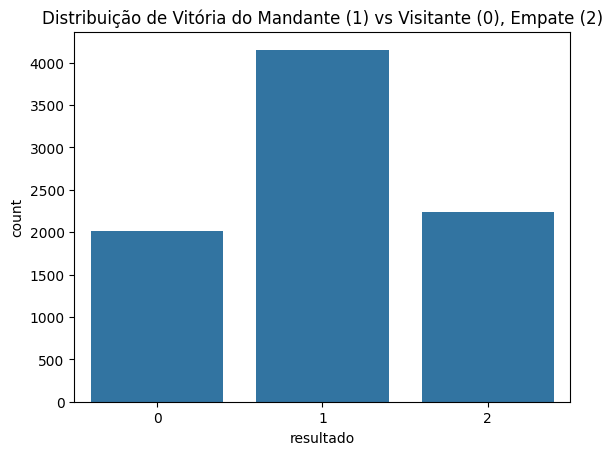

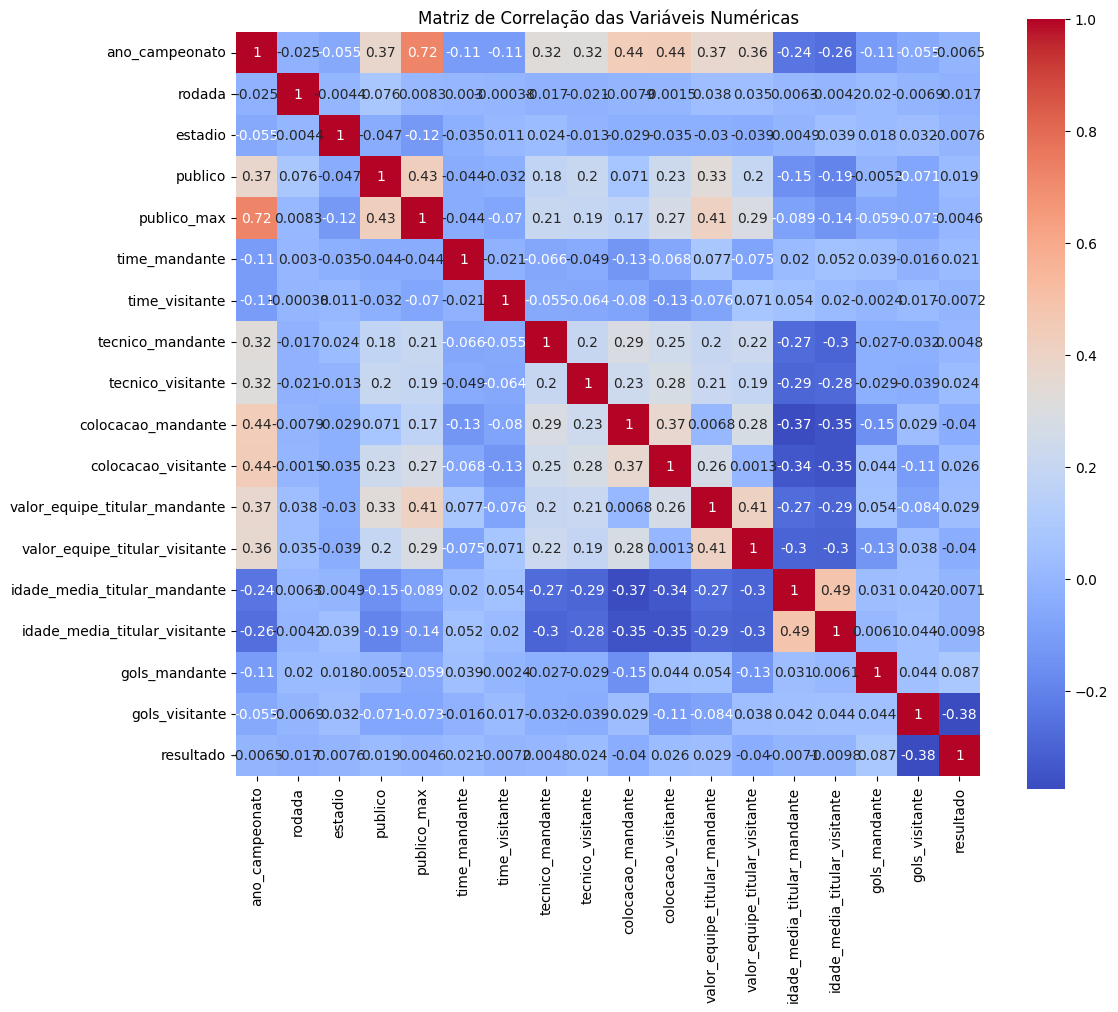

In [16]:
# Verificando a distribuição do resultado da partida (vencedor)
sns.countplot(x='resultado', data=df_selecionado)
plt.title('Distribuição de Vitória do Mandante (1) vs Visitante (0), Empate (2)')
plt.show()

# Verificando a correlação entre as variáveis numéricas
# Selecionando apenas as colunas numéricas para a matriz de correlação
df_numerico = df_selecionado.select_dtypes(include=[np.number])

# Verificando a correlação entre as variáveis numéricas
corr_matrix = df_numerico.corr()

# Exibindo a matriz de correlação com um heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Matriz de Correlação das Variáveis Numéricas')
plt.show()




Está um pouco desbalanceado, mas optamos por não utilizar técnicas de oversampling ou undersampling para manter a representatividade do mercado real.

Os outliers que observamos são importantes, pois indicam variações significativas entre as empresas. Essas diferenças podem ser causadas por diversos fatores do mercado ou estratégias empresariais. Portanto, optamos por mantê-los em nossa análise, pois eles são relevantes para uma avaliação abrangente e precisa, evitando distorções nos resultados.

Como esperado, observamos uma relação entre os indicadores de retorno sobre o patrimônio líquido (ROE), retorno sobre o capital investido (ROIC) e retorno sobre os ativos (ROA) com os indicadores de lucratividade EBITIDA, além de uma correlação com o indicador composto CAGR (CAGR RECEITAS 5 ANOS e CAGR LUCROS 5 ANOS).

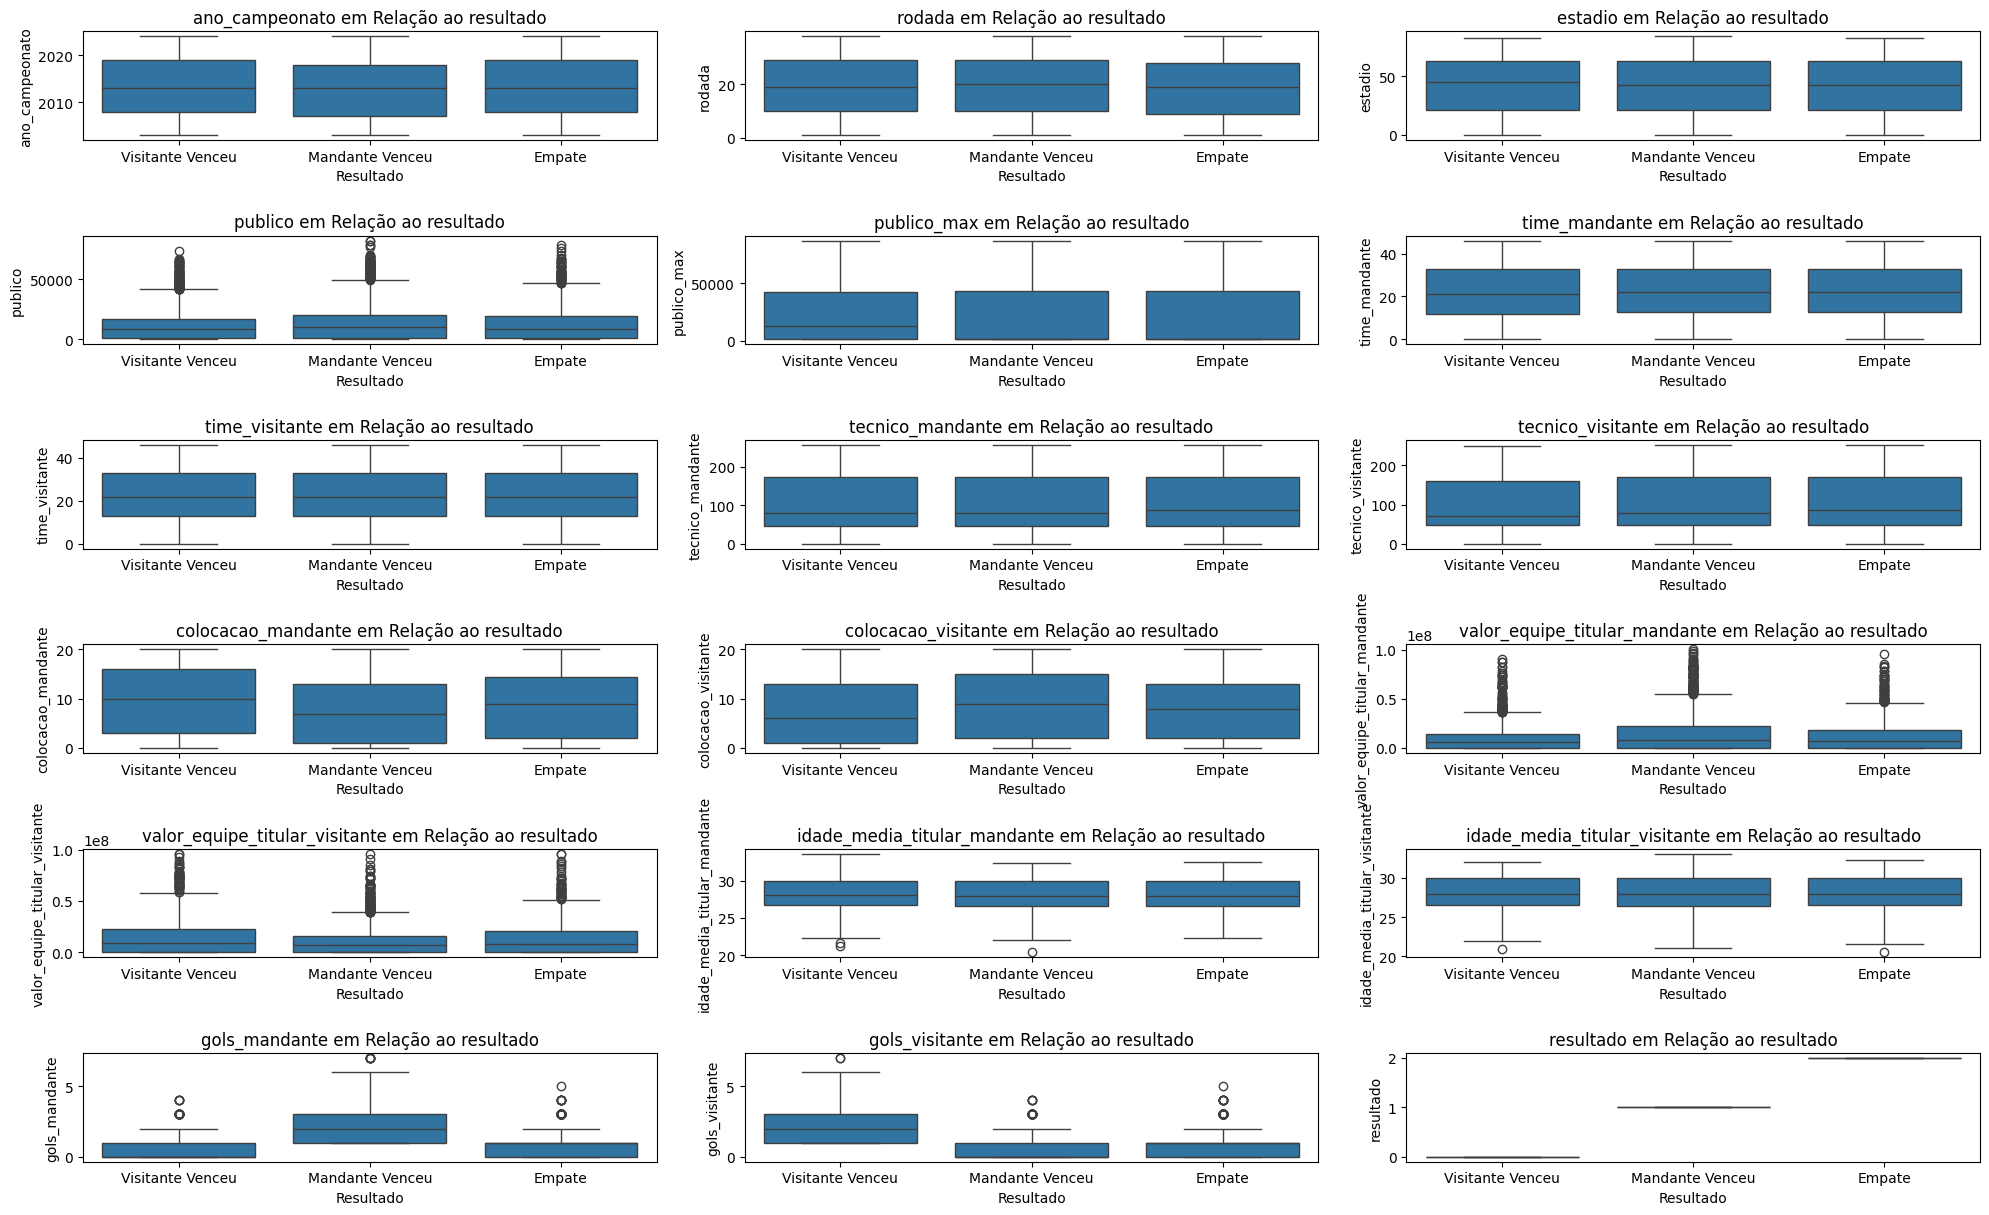

In [17]:
# Definindo as classes para mapeamento do resultado
class_names = {1: "Mandante Venceu", 0: "Visitante Venceu", 2: "Empate"}
df_selecionado["Resultado_Label"] = df_selecionado["resultado"].map(class_names)

# Selecionando apenas as variáveis numéricas para o gráfico
numeric_vars = df_selecionado.select_dtypes(include=[np.number]).columns


# Definindo o tamanho da figura para exibir todos os gráficos
plt.figure(figsize=(20, 20))

# Loop para criar um boxplot para cada variável numérica em relação ao "Resultado"
for i, var in enumerate(numeric_vars, 1):
    plt.subplot(10, 3, i)
    sns.boxplot(x="Resultado_Label", y=var, data=df_selecionado)
    plt.title(f'{var} em Relação ao resultado')
    plt.xlabel('Resultado')
    plt.ylabel(var)

# Ajuste de layout para evitar sobreposição
plt.tight_layout()
plt.show()


Ao analisar os boxplots das variáveis numéricas em relação ao alvo ("Barata", "Cara", "Neutra"), observa-se que não há uma clara diferenciação entre as categorias. Os gráficos mostram que a maioria dos valores está distribuída de forma equilibrada entre as categorias, com exceção de alguns outliers que estão mais distantes da distribuição principal. Isso sugere que essas variáveis podem não ter uma relação direta ou significativa com a classificação das ações como "Barata", "Cara" ou "Neutra".

<a id="3"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">5. Escolha do algoritmo:</p>


Nessa etapa um modelo inicial é escolhido (nesse caso, o RandomForestClassifier), e ele é treinado com os dados de treino.


## Primeiro vamos fazer o split dos dados

Observação: não utilizamos validação cruzada devido ao nosso dataset conter poucos dados. Realizamos um teste com validação cruzada, onde a média da acurácia foi de 0.46. Portanto, é possível esperar que nosso modelo tenha um desempenho um pouco inferior em produção do que o resultado obtido neste teste.

In [18]:
# Seleção das variáveis de entrada (features) e alvo (target)
X = df_selecionado[['publico', 'publico_max', 'colocacao_mandante', 'colocacao_visitante',
        'valor_equipe_titular_mandante', 'valor_equipe_titular_visitante',
        'idade_media_titular_mandante', 'idade_media_titular_visitante',
        'tecnico_mandante', 'tecnico_visitante', 'estadio']]
y = df_selecionado['resultado']  # 1 = Mandante vence, 0 = Visitante vence

# Dividindo os dados em treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Vamos remover as linhas sem alvo para validar o modelo posteriormente.

Realizamos um teste com um conjunto reduzido de características, selecionando aquelas que consideramos mais importantes para o valor da ação. No entanto, o resultado foi inferior ao usar o conjunto completo de features, que inclui a coluna gerada com a fórmula de Graam.

In [19]:

print("Dimensões do conjunto de treinamento (features):", X_train.shape)
print("Dimensões do conjunto de teste (features):", X_test.shape)
print("Dimensões do conjunto de treinamento (Resultado):", y_train.shape)
print("Dimensões do conjunto de teste (Resultado):", y_test.shape)


Dimensões do conjunto de treinamento (features): (5881, 11)
Dimensões do conjunto de teste (features): (2521, 11)
Dimensões do conjunto de treinamento (Resultado): (5881,)
Dimensões do conjunto de teste (Resultado): (2521,)


Agora, vamos aplicar uma técnica de escala nos nossos dados numéricos. É importante realizar essa etapa separadamente nos conjuntos de treinamento e teste para evitar vazamento de dados.

In [20]:
scaler = Normalizer()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Vamos agora treinar os modelos utilizando os seguintes algoritmos: Random Forest, Gradient Boosting, Support Vector Machines (SVM), K-Nearest Neighbors (KNN) e Naive Bayes. Escolhemos esses algoritmos por sua eficácia e versatilidade em lidar com problemas de classificação. O Random Forest e o Gradient Boosting são conhecidos por sua capacidade de lidar com dados complexos e grandes conjuntos de dados, enquanto o SVM é eficaz na separação de classes em espaços de alta dimensão. O KNN é simples de entender e implementar, sendo útil para identificar padrões em conjuntos de dados menores. Por fim, o Naive Bayes é rápido e eficiente para conjuntos de dados com muitas features. Vamos comparar os resultados obtidos por cada um desses algoritmos, selecionar o melhor e, aprimorá-lo com a utilização de hiperparâmetros.

In [21]:
# Instanciando o modelo de Regressão Logística
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
# Fazendo previsões
y_pred_log = log_reg.predict(X_test)
# Avaliação do modelo
print("Acurácia - Regressão Logística:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

# Instanciando o modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
# Fazendo previsões
y_pred_rf = rf_model.predict(X_test)
# Avaliação do modelo
print("Acurácia - Random Forest:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Instanciando o modelo XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
# Fazendo previsões
y_pred_xgb = xgb_model.predict(X_test)
# Avaliação do modelo
print("Acurácia - XGBoost:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

# Instanciando o modelo de Árvore de Decisão
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
# Fazendo previsões
y_pred_dt = dt_model.predict(X_test)
# Avaliação do modelo
print("Acurácia - Árvore de Decisão:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))





Acurácia - Regressão Logística: 0.5124950416501388
              precision    recall  f1-score   support

           0       0.41      0.15      0.22       598
           1       0.52      0.95      0.67      1264
           2       0.00      0.00      0.00       659

    accuracy                           0.51      2521
   macro avg       0.31      0.37      0.30      2521
weighted avg       0.36      0.51      0.39      2521

Acurácia - Random Forest: 0.50059500198334
              precision    recall  f1-score   support

           0       0.38      0.21      0.27       598
           1       0.54      0.85      0.66      1264
           2       0.31      0.10      0.15       659

    accuracy                           0.50      2521
   macro avg       0.41      0.38      0.36      2521
weighted avg       0.44      0.50      0.43      2521

Acurácia - XGBoost: 0.4843316144387148
              precision    recall  f1-score   support

           0       0.36      0.20      0.26       

Com base nos resultados fornecidos, a análise dos modelos de machine learning indica algumas questões importantes sobre o desempenho de cada modelo na tarefa de classificação do "resultado" de uma partida. Vamos analisar cada um dos modelos:

**1. Regressão Logística**
Acurácia: 51,25%
Análise: A acurácia está relativamente baixa. No entanto, a acurácia é uma métrica limitada para problemas de classificação desbalanceada, como este, onde temos uma classe (vitória do mandante) mais prevalente.
Precision, Recall e F1-Score: A classe 1 (vitória do mandante) tem uma boa precisão (0.52) e recall (0.95), o que indica que o modelo está acertando muitas das vitórias do mandante. No entanto, a classe 2 (empate) tem uma precisão e recall baixíssimos (0.00), o que significa que o modelo não está conseguindo prever os empates.
Sugestão: A regressão logística pode precisar de mais ajustes, como balanceamento de classes, ou a escolha de uma estratégia diferente para lidar com classes desbalanceadas (ex.: ajuste de pesos).


**2. Random Forest**
Acurácia: 50,06%
Análise: A Random Forest oferece uma acurácia ligeiramente melhor que a regressão logística e a árvore de decisão.
Precision, Recall e F1-Score:
Para a classe 1 (vitória do mandante), o modelo tem uma precisão razoável de 0.54 e recall de 0.85, o que indica que o modelo está acertando bem as vitórias do mandante, mas ainda pode melhorar em termos de precisão.
A classe 2 (empate) continua com um desempenho baixo, especialmente em termos de recall (0.10).
Sugestão: A Random Forest é uma boa escolha para lidar com problemas mais complexos, mas ainda pode ser melhorada com ajuste de parâmetros e balanceamento de classes.


**3. XGBoost**
Acurácia: 48,43%
Análise: O XGBoost tem um desempenho um pouco abaixo do Random Forest, mas não está muito distante. XGBoost é conhecido por ser robusto, mas neste caso, parece não estar agregando valor significativo.
Precision, Recall e F1-Score:
A classe 1 (vitória do mandante) tem um recall de 0.78, o que é bom, mas a precisão (0.54) ainda deixa a desejar.
A classe 2 (empate) apresenta resultados ruins, como nos outros modelos.
Sugestão: Testar diferentes configurações do XGBoost (número de estimadores, taxa de aprendizado) para melhorar a previsão da classe de empate.


**4. Árvore de Decisão**
Acurácia: 42,56%
Análise: A acurácia continua baixa, mas a árvore de decisão está tentando ajustar os dados com uma abordagem mais interpretável.
Precision, Recall e F1-Score:
Para a classe 1 (vitória do mandante), o modelo tem um recall razoável de 0.61, mas a precisão (0.53) é baixa, indicando que ele também está cometendo erros.
A classe 2 (empate) tem desempenho semelhante à regressão logística com um baixo recall (0.24) e uma precisão também baixa.
Sugestão: Melhorar a árvore de decisão ajustando seus parâmetros como profundidade máxima (max_depth), min_samples_split, entre outros. Experimentos com regularização podem melhorar o desempenho.





**Considerações Finais**
Desbalanceamento de Classes: O desempenho dos modelos em relação à classe 2 (empate) é bem abaixo do esperado. Isso pode indicar que o dataset está desbalanceado, com a classe de vitórias sendo muito mais prevalente. Em problemas com desbalanceamento, algumas abordagens podem ser tentadas:

Ajuste de pesos das classes nos modelos.
Oversampling/Undersampling (técnicas como SMOTE ou subamostragem da classe majoritária).
Métricas de avaliação: Considerar métricas como o F1-Score ou AUC-ROC, que podem dar uma visão mais equilibrada sobre o desempenho do modelo, especialmente em situações de classes desbalanceadas.
Acurácia Limitada: Em problemas desbalanceados, a acurácia por si só não é a melhor métrica. A análise das métricas de precision, recall e F1-Score são mais informativas, pois mostram a habilidade do modelo em lidar com as diferentes classes.

**Sugestões:**

Balanceamento de classes: Como a classe de empate está sendo muito mal predita, aplicar técnicas de balanceamento (como oversampling ou undersampling) pode melhorar o desempenho.
Ajuste de hiperparâmetros: Todos os modelos podem ser ajustados para melhorar seu desempenho, como aumentar o número de árvores na Random Forest, ajustar a profundidade da árvore de decisão, ou modificar as configurações do XGBoost.
Experimentar outras abordagens: Outras técnicas, como redes neurais, podem ser exploradas para melhorar os resultados em problemas complexos.
Se o objetivo for melhorar a previsão dos empates, uma possível solução seria criar um modelo especificamente para detectar a classe "empate", talvez com um modelo separado para prever quando o jogo termina empatado versus quando é decidido.








In [22]:
scaler = Normalizer()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instanciando o modelo de Regressão Logística
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)
# Fazendo previsões
y_pred_log = log_reg.predict(X_test_scaled)
# Avaliação do modelo
print("Acurácia - Regressão Logística:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

# Instanciando o modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
# Fazendo previsões
y_pred_rf = rf_model.predict(X_test_scaled)
# Avaliação do modelo
print("Acurácia - Random Forest:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Instanciando o modelo XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)
# Fazendo previsões
y_pred_xgb = xgb_model.predict(X_test_scaled)
# Avaliação do modelo
print("Acurácia - XGBoost:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

# Instanciando o modelo de Árvore de Decisão
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)
# Fazendo previsões
y_pred_dt = dt_model.predict(X_test_scaled)
# Avaliação do modelo
print("Acurácia - Árvore de Decisão:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Acurácia - Regressão Logística: 0.5113050376834589
              precision    recall  f1-score   support

           0       0.40      0.15      0.22       598
           1       0.52      0.95      0.67      1264
           2       0.00      0.00      0.00       659

    accuracy                           0.51      2521
   macro avg       0.31      0.37      0.30      2521
weighted avg       0.36      0.51      0.39      2521

Acurácia - Random Forest: 0.4962316541055137
              precision    recall  f1-score   support

           0       0.38      0.22      0.28       598
           1       0.55      0.82      0.66      1264
           2       0.30      0.12      0.17       659

    accuracy                           0.50      2521
   macro avg       0.41      0.39      0.37      2521
weighted avg       0.44      0.50      0.44      2521

Acurácia - XGBoost: 0.4720349067830226
              precision    recall  f1-score   support

           0       0.32      0.17      0.23     

Com base nos resultados fornecidos para os modelos de machine learning, vamos analisar o desempenho de cada um deles:

**1. Regressão Logística**
Acurácia: 51.13%
Precision, Recall e F1-Score:
Classe 1 (Vitória do mandante): O modelo apresenta um bom desempenho em termos de recall (0.95), o que significa que ele está identificando corretamente a maioria das vitórias do mandante. No entanto, a precision (0.52) ainda é moderada, indicando que há muitos falsos positivos para essa classe.
Classe 0 (Derrota do mandante): A precisão (0.40) e o recall (0.15) são baixíssimos, indicando que o modelo tem dificuldades para prever corretamente quando o mandante perde.
Classe 2 (Empate): O modelo falhou completamente em prever empates, com precision, recall, e f1-score igual a 0.00.
Análise: A regressão logística tem um desempenho aceitável para a classe 1 (vitória do mandante), mas falha em lidar com as classes 0 e 2 (derrota e empate). Isso pode ser resultado de um desbalanceamento de classes, já que a classe 1 é mais prevalente.


**2. Random Forest**
Acurácia: 49.62%
Precision, Recall e F1-Score:
Classe 1 (Vitória do mandante): A Random Forest tem uma precisão razoável (0.55) e recall de 0.82, o que significa que, embora haja erros, ela é eficiente em identificar vitórias do mandante.
Classe 0 (Derrota do mandante): A precisão (0.38) e recall (0.22) são novamente baixas, indicando que o modelo tem dificuldades em identificar quando o mandante perde.
Classe 2 (Empate): A precisão (0.30) e recall (0.12) para empates são igualmente baixas.
Análise: A Random Forest se comporta de maneira semelhante à regressão logística, identificando com mais precisão as vitórias do mandante, mas com dificuldades nas classes 0 e 2. O modelo parece ter uma performance razoável para prever a classe 1, mas falha em prever empates e derrotas.


**3. XGBoost**
Acurácia: 47.20%
Precision, Recall e F1-Score:
Classe 1 (Vitória do mandante): O modelo tem recall razoável (0.78), mas a precisão (0.53) ainda é baixa, indicando que ele comete erros ao prever vitórias do mandante.
Classe 0 (Derrota do mandante): A precisão (0.32) e recall (0.17) são novamente baixas, semelhante ao comportamento dos outros modelos.
Classe 2 (Empate): A precisão (0.28) e recall (0.15) para empates são muito baixos, mostrando que o modelo não está conseguindo capturar essa classe.
Análise: O desempenho do XGBoost é muito semelhante ao da Random Forest. Embora consiga identificar algumas vitórias do mandante, ele falha nas previsões de empates e derrotas.


**4. Árvore de Decisão**
Acurácia: 41.09%
Precision, Recall e F1-Score:
Classe 1 (Vitória do mandante): A precisão (0.53) e recall (0.60) são razoáveis, mas o modelo não é tão bom quanto os modelos anteriores na identificação de vitórias do mandante.
Classe 0 (Derrota do mandante): A precisão (0.25) e recall (0.22) são muito baixas, indicando que a árvore de decisão tem dificuldades em prever derrotas do mandante.
Classe 2 (Empate): A precisão (0.26) e recall (0.22) também são baixas para a classe de empate.
Análise: A árvore de decisão tem o pior desempenho geral em comparação com os outros modelos, com acurácia e métricas de precisão e recall baixas para todas as classes. Ela parece não estar capturando padrões importantes nos dados.

**Conclusões e Recomendações:**
**Desbalanceamento de Classes:**

O problema de desbalanceamento de classes é evidente. A classe 1 (vitória do mandante) tem um desempenho relativamente bom, mas as classes 0 (derrota) e 2 (empate) têm métricas de desempenho muito baixas, especialmente o recall.
Sugestão: Experimentar técnicas de balanceamento de classes (como SMOTE ou undersampling) para melhorar a detecção das classes minoritárias.

**Acurácia Insuficiente:**

Nenhum dos modelos tem uma acurácia significativamente alta. A média de acurácia está em torno de 50%, indicando que os modelos estão apenas “adivinhando” as classes com uma chance ligeiramente melhor que o acaso.
Sugestão: Testar modelos mais avançados, como redes neurais, ou utilizar modelos de ensemble mais complexos, como Stacking ou Gradient Boosting Machines (GBM), para tentar melhorar a acurácia.
Foco em Melhorar o Recall para Empates e Derrotas:

Os modelos têm dificuldades significativas na previsão de empates (classe 2) e derrotas (classe 0). Melhorar o recall para essas classes seria um bom objetivo.
Sugestão: Tentar diferentes abordagens, como treinamento por separado para as classes minoritárias, ou ajustar os pesos das classes para enfatizar mais as classes 0 e 2.

**Análise de Features:**

Pode ser útil realizar uma análise mais profunda das features e como elas se correlacionam com o resultado final (vitória, empate, derrota).
Sugestão: Realizar uma seleção de atributos ou até mesmo tentar transformações nos dados (ex.: agregação de características ou criação de novas variáveis) para melhorar a modelagem.
Com essas considerações, o objetivo seria melhorar o desempenho dos modelos, especialmente para as classes que não estão sendo bem previstas, com foco no balanceamento das classes e ajustes nos modelos.

k


**Undersampling **

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Importando o SMOTE
from imblearn.over_sampling import SMOTE

# Criando uma instância do SMOTE
smote = SMOTE(random_state=42)

# Aplicando o SMOTE para balancear as classes
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Verificando o balanceamento após o SMOTE
from collections import Counter
print(f"Antes do balanceamento: {Counter(y_train)}")
print(f"Depois do balanceamento: {Counter(y_resampled)}")



# Balanceando as classes
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Treinando o modelo
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_resampled, y_resampled)

# Fazendo previsões
y_pred = log_reg.predict(X_test)
# Avaliando o modelo
print("Acurácia - Regressão Logística após balanceamento:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


# Instanciando o modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
# Fazendo previsões
y_pred_rf = rf_model.predict(X_test)
# Avaliação do modelo
print("Acurácia - Random Forest:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Instanciando o modelo XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
# Fazendo previsões
y_pred_xgb = xgb_model.predict(X_test)
# Avaliação do modelo
print("Acurácia - XGBoost:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

# Instanciando o modelo de Árvore de Decisão
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
# Fazendo previsões
y_pred_dt = dt_model.predict(X_test)
# Avaliação do modelo
print("Acurácia - Árvore de Decisão:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))







Antes do balanceamento: Counter({1: 2889, 2: 1576, 0: 1416})
Depois do balanceamento: Counter({1: 2889, 0: 2889, 2: 2889})
Acurácia - Regressão Logística após balanceamento: 0.3891312971043237
              precision    recall  f1-score   support

           0       0.33      0.33      0.33       598
           1       0.57      0.41      0.48      1264
           2       0.26      0.40      0.31       659

    accuracy                           0.39      2521
   macro avg       0.39      0.38      0.37      2521
weighted avg       0.43      0.39      0.40      2521

Acurácia - Random Forest: 0.50059500198334
              precision    recall  f1-score   support

           0       0.38      0.21      0.27       598
           1       0.54      0.85      0.66      1264
           2       0.31      0.10      0.15       659

    accuracy                           0.50      2521
   macro avg       0.41      0.38      0.36      2521
weighted avg       0.44      0.50      0.43      2521

Ac

A análise dos resultados após o balanceamento das classes mostra que, apesar de equilibrar as classes usando o SMOTE, a performance dos modelos ainda não é ideal. Vamos analisar cada um deles com base nas métricas fornecidas.

**1. Regressão Logística:**
Acurácia: 0.39
Precision: A precisão para a classe 1 (o mandante vencedor) é relativamente boa (0.57), mas as outras classes têm precisão muito baixa (classe 0 com 0.33 e classe 2 com 0.26).
Recall: O recall para a classe 1 também é bom (0.41), mas novamente as outras classes têm um recall mais baixo, o que significa que o modelo está tendo dificuldades para identificar essas classes.
F1-Score: A média ponderada do F1-score (0.40) é relativamente baixa, indicando um desempenho geral fraco.


**2. Random Forest:**
Acurácia: 0.50
Precision: A precisão da classe 1 é razoavelmente boa (0.54), mas as outras classes continuam com precisão baixa (classe 0 com 0.38 e classe 2 com 0.31).
Recall: O recall para a classe 1 (0.85) é alto, o que indica que o modelo está fazendo um bom trabalho em identificar a classe 1, mas os outros recall são baixos.
F1-Score: O F1-score para a classe 1 é bastante bom (0.66), mas o modelo continua com dificuldades nas outras classes, com o F1-score da classe 0 em 0.27 e da classe 2 em 0.15.


**3. XGBoost:**
Acurácia: 0.48
Precision: A precisão para a classe 1 (0.54) é razoável, mas a classe 2 ainda tem uma precisão muito baixa (0.31), e a classe 0 tem 0.36.
Recall: O recall para a classe 1 é o mais alto (0.78), mas o recall para as classes 0 e 2 ainda são baixos, o que sugere que o modelo tem dificuldades em prever essas classes.
F1-Score: O F1-score para a classe 1 é decente (0.64), mas o desempenho geral ainda não é ideal, com F1-score para as classes 0 e 2 bem abaixo do desejado.

**4. Árvore de Decisão:**
Acurácia: 0.43
Precision: A precisão é relativamente baixa para todas as classes, com a classe 1 apresentando a melhor precisão (0.53), mas as classes 0 e 2 continuam com precisão baixa (0.27 e 0.28, respectivamente).
Recall: O recall para a classe 1 é mais alto (0.61), mas novamente as outras classes apresentam um recall mais baixo.
F1-Score: O F1-score da classe 1 (0.57) é mais alto, mas o modelo tem um desempenho fraco nas outras classes.


**Conclusões:**
Modelo Regressão Logística: Mostra uma performance medíocre com uma baixa acurácia (0.39). Isso pode ser atribuído à dificuldade do modelo em lidar com o desequilíbrio das classes, embora o balanceamento tenha ajudado a equilibrar as classes. O recall da classe 1 ainda é razoável, mas o modelo tem grande dificuldade em prever as outras classes.

Random Forest e XGBoost: Ambos os modelos apresentam um desempenho mais equilibrado, mas ainda falham nas classes 0 e 2. O Random Forest tem a melhor acurácia entre os modelos (0.50), enquanto o XGBoost apresenta uma acurácia ligeiramente inferior (0.48). No entanto, o Random Forest tem uma precisão mais baixa para a classe 2, enquanto o XGBoost também apresenta dificuldade em prever as classes menos representadas.

Árvore de Decisão: A árvore de decisão tem a pior acurácia (0.43) e também apresenta dificuldades para prever corretamente as classes, especialmente a classe 0.

**Sugestões para Melhorias:**
Tuning de Hiperparâmetros: O desempenho dos modelos pode ser melhorado com a otimização dos hiperparâmetros (usando GridSearch ou RandomizedSearch). Modelos como XGBoost e Random Forest podem se beneficiar dessa abordagem.

Considerar a adoção de modelos híbridos (como uma combinação de Random Forest com XGBoost) para tentar melhorar a capacidade preditiva.

Revisão de Features: Se as features não forem bem definidas ou informativas o suficiente, pode ser necessário realizar um feature engineering mais robusto, adicionando, removendo ou transformando variáveis.

Ajuste de Pesos das Classes: Para melhorar o desempenho nas classes menos representadas, pode-se tentar ajustar os pesos das classes durante o treinamento, principalmente nos modelos como a Regressão Logística e Árvore de Decisão.

Avaliação de Métricas: Dado que a acurácia pode não ser a métrica ideal para avaliar modelos em problemas desbalanceados, considere avaliar precision, recall e F1-score para cada classe de forma mais detalhada.

Essas etapas podem ajudar a melhorar a previsão das classes de maneira mais eficaz, especialmente quando se trabalha com conjuntos de dados desbalanceados.

**************

***********************************************

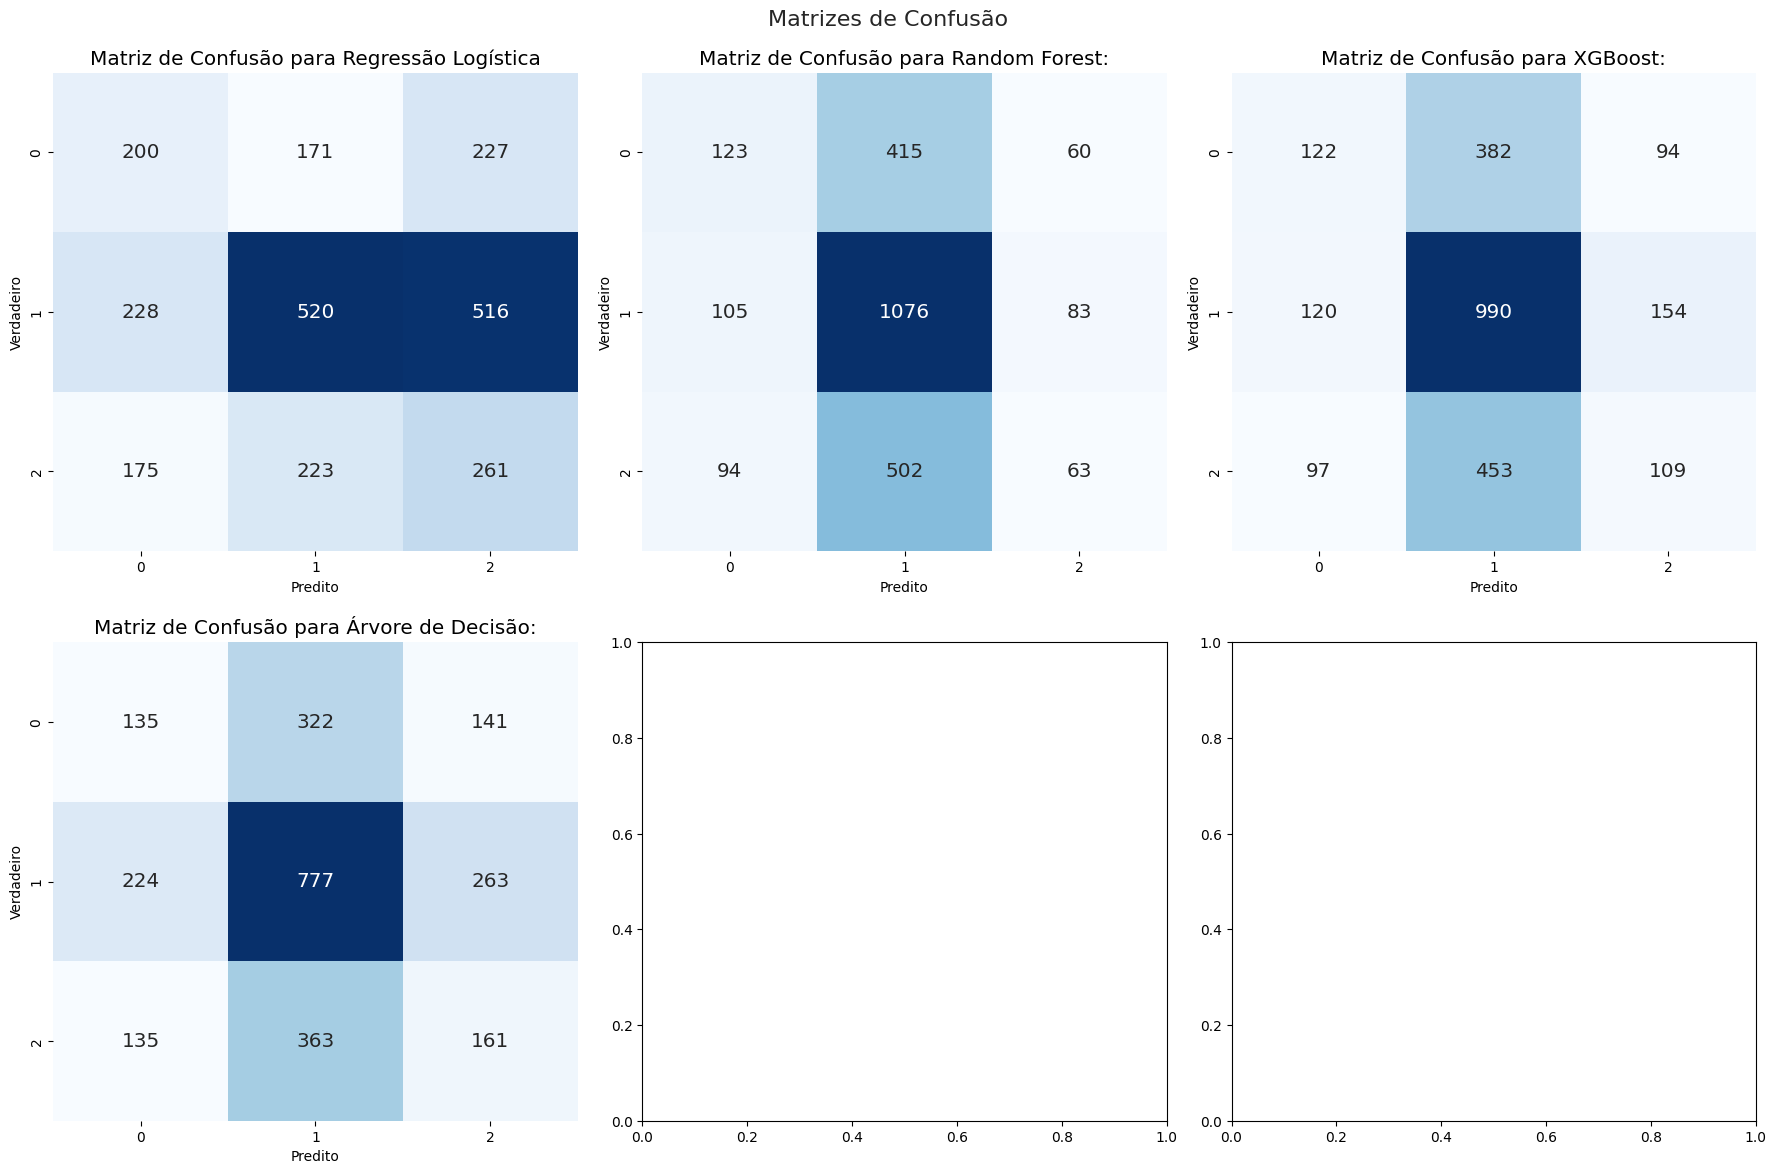

In [24]:
# Função para imprimir a matriz de confusão como um heatmap em um subplot
def plot_confusion_matrix_subplot(ax, nome_modelo, y_true, y_pred):
    matriz = confusion_matrix(y_true, y_pred)
    sns.set(font_scale=1.2)
    sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_xlabel('Predito')
    ax.set_ylabel('Verdadeiro')
    ax.set_title(f'Matriz de Confusão para {nome_modelo}')

# Criar uma figura com subplots agrupados a cada 3
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

plot_confusion_matrix_subplot(axs[0, 0], "Regressão Logística", y_test, y_pred)
plot_confusion_matrix_subplot(axs[0, 1], "Random Forest:", y_test, y_pred_rf)
plot_confusion_matrix_subplot(axs[0, 2], "XGBoost:", y_test, y_pred_xgb)
plot_confusion_matrix_subplot(axs[1, 0], "Árvore de Decisão:", y_test, y_pred_dt)


plt.suptitle('Matrizes de Confusão', fontsize=16)

plt.tight_layout()
plt.show()

<a id="4"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">6. Otimização do modelo:</p>

Nessa etapa , vamos buscar por hiperparâmetros usando GridSearchCV para encontrar a combinação de parâmetros que maximiza a acurácia.



Para a Sugestão 1: Tuning de Hiperparâmetros, podemos usar as técnicas de Grid Search ou Randomized Search para encontrar os melhores parâmetros para os modelos de aprendizado de máquina. Vou te mostrar como implementar ambos os métodos, com exemplos para Random Forest e XGBoost.

1. Grid Search
O GridSearchCV faz uma busca exaustiva sobre um conjunto de parâmetros especificados para o modelo. Ele vai testar todas as combinações possíveis desses parâmetros.

Exemplo: Random Forest com GridSearchCV

In [35]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from scipy.stats import randint

# Definir as variáveis numéricas e categóricas
numeric_vars = ['numerical_feature1', 'numerical_feature2']  # Substitua pelos nomes das variáveis numéricas
categorical_vars = ['categorical_feature1', 'categorical_feature2']  # Substitua pelos nomes das variáveis categóricas

# Criar o pré-processador para variáveis numéricas e categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),  # Preenche valores faltantes com a média
            ('scaler', StandardScaler())  # Normaliza as variáveis numéricas
        ]), numeric_vars),

        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Preenche valores faltantes com 'missing'
            ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Codifica variáveis categóricas
        ]), categorical_vars)
    ])

# Criar o modelo de Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Criar o pipeline com pré-processamento e modelo
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', rf_model)
])

# Definir os parâmetros para busca
param_dist = {
    'classifier__n_estimators': randint(100, 500),  # Número de árvores entre 100 e 500
    'classifier__max_depth': [None, 10, 20, 30],     # Profundidade máxima das árvores
    'classifier__min_samples_split': randint(2, 10), # Número mínimo de amostras para dividir um nó
    'classifier__min_samples_leaf': randint(1, 10),  # Número mínimo de amostras em um nó folha
    'classifier__max_features': ['auto', 'sqrt', 'log2']  # Número máximo de features para considerar
}




# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(df_selecionado.drop('resultado', axis=1), df_selecionado['resultado'], test_size=0.2, random_state=42)

# RandomizedSearchCV (Busca Aleatória de Hiperparâmetros)
#random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist,
                              #     n_iter=100, cv=5, scoring='accuracy', n_jobs=-1, verbose=2, random_state=42)



import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline



# Separando os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline de pré-processamento e modelo
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Ajustando o pipeline
X_train_transformed = pipeline.fit_transform(X_train)

# Verificando a transformação
print(X_train_transformed)





# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=10,  # Menos iterações para testar
    cv=3,
    verbose=2,
    random_state=42,
    error_score='raise'
)


# Treinar o modelo com RandomizedSearch
random_search.fit(X_train, y_train)

# Melhor modelo encontrado
print("Melhores parâmetros:", random_search.best_params_)

# Obter o modelo treinado com os melhores parâmetros
best_model = random_search.best_estimator_

# Fazer previsões e avaliar o desempenho
y_pred = best_model.predict(X_test)

# Avaliar com o relatório de classificação
print(classification_report(y_test, y_pred))

[[-0.30902178  0.50643908  1.43827547 ... -0.44299838 -0.07813935
  -1.09993078]
 [ 0.51163511  0.72152536  1.13807828 ... -0.0944926   0.16817736
   0.33295456]
 [ 1.52521432  1.95438178  0.23748674 ... -0.71107975  1.67344617
  -0.63635023]
 ...
 [ 0.44541019  2.35308497  0.53768392 ... -1.44830352 -0.78972097
   0.16437982]
 [ 0.98089007  1.38535308 -1.11340057 ...  0.53549862 -1.04972195
  -0.04633862]
 [ 1.95693463 -0.82270187 -1.11340057 ... -1.0327774   0.75660062
   0.88082249]]


TypeError: If no scoring is specified, the estimator passed should have a 'score' method. The estimator Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler())]) does not.

xxxxx

In [ ]:
param_grid = {
    'n_estimators': [1, 3, 5, 6, 7, 8, 10, 15, 20, 25, 30, 35, 40, 45, 50, 100, 150],
    'learning_rate': [0.01, 0.02, 0.1, 0.5],
    'max_depth': [1, 2, 3, 4, 5, 7, 10, 15]
}

gb2 = GradientBoostingClassifier(random_state=99)

grid_search = GridSearchCV(estimator=gb2, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Melhor Score:", grid_search.best_score_)
print("Melhores Parâmetros:", grid_search.best_params_)

best_gb = grid_search.best_estimator_
best_gb_pred = best_gb.predict(X_test)

print("Melhor Modelo (Gradient Boosting):")
print(classification_report(y_test, best_gb_pred))

plot_confusion_matrix_subplot(plt.gca(), "Melhor Modelo (Gradient Boosting)", y_test, best_gb_pred)
plt.show()

Como podemos observar, os resultados com a utilização de hiperparâmetros foram piores, tanto em termos de acurácia quanto de precisão das classes. O modelo apresentou dificuldades especialmente na identificação da classe 1.

<a id="5"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">7. Valiação dos resultados:</p>

Nessa etapa vamos fazer a Geração de previsões, cálculo de acurácia, e exibição de métricas e visualizações de desempenho.

### Testes sem hiperparâmetros:

- Random Forest:

    - A precisão para a classe 1 é baixa, indicando dificuldade em identificar corretamente essa classe.
    - A acurácia geral foi de 51%, com um f1-score médio de 0.43.

- Gradient Boosting:

    - O modelo teve um desempenho melhor que o Random Forest, especialmente para as classes 1.
    - A acurácia geral foi de 50%, com um f1-score médio de 0.47.

- Support Vector Machines (SVM):

    - O SVM teve dificuldades em prever a classe 1, com uma precisão de 0%.
    - A acurácia geral foi de 45%, com um f1-score médio de 0.26.

- K-Nearest Neighbors (KNN):

    - O KNN teve um desempenho intermediário, com precisões e recalls equilibrados para as três classes.
    - A acurácia geral foi de 39%, com um f1-score médio de 0.35.

- Naive Bayes:

    - O Naive Bayes teve dificuldades em prever as classes 1 e 3, com baixa precisão e recall.
    - A acurácia geral foi de 41%, com um f1-score médio de 0.35.



Em geral, nenhum dos modelos apresentou um desempenho excepcional. O Gradient Boosting foi o melhor modelo em termos de acurácia e precisão para as três classes, mas ainda há espaço para melhorias. Vamos considerá-lo como o melhor modelo e tentar melhorar ainda mais seu desempenho ajustando os hiperparâmetros.

### Testes com hiperparâmetros:

- Teve uma acurácia de 46%.
- A classe 1 teve uma precisão de 0%, recall de 0% e f1-score de 0%.
- A classe 2 teve uma precisão de 57%, recall de 9% e f1-score de 15%.
- A classe 3 teve uma precisão de 45%, recall de 97% e f1-score de 62%.


Os resultados com hiperparâmetros mostraram uma precisão significativamente menor para a classe 1, chegando a zero. Isso indica que o modelo com hiperparâmetros teve dificuldades em prever corretamente a classe 1, o que pode ser um indicativo de overfitting.

<a id="5"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">8. Conclusão:</p>

Com uma acurácia próxima de 50% (considerando três classes, o que para o mercado financeiro não é considerado tão ruim), e com a seleção de ativos realizada por um analista com expertise, podemos afirmar que esse método é interessante e merece ser explorado. Embora esperasse uma precisão um pouco maior, não consegui melhorar os resultados. Talvez se tivéssemos mais dados disponíveis, como dados mensais em vez de anuais, poderíamos obter melhores resultados. No entanto, não consegui encontrar esses dados gratuitamente, acredito que apenas uma API paga ofereceria essa possibilidade.

O método atual pode ser explorado com mais ênfase na classe "Barata", visando exclusivamente à compra de ativos. No entanto, o projeto atual propõe uma abordagem que envolve tanto a compra quanto a venda de ativos, exigindo um equilíbrio entre as três classes ("Cara", "Barata" e "Neutra"). Portanto, não podemos priorizar apenas uma classe neste contexto, mas sim considerar o cenário completo para uma análise mais abrangente e equilibrada das decisões de investimento.

* É importante ressaltar que, como o preço do ano atual e do seguinte foi considerado como a média, esse percentual de acerto pode variar significativamente no teste real, pois depende muito do momento da compra ou da venda da ação.

## Exportando o melhor modelo treinado para posteriormente fazer o deploy

In [ ]:
model_dir = '../../data/models'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

dump(gb, os.path.join(model_dir, 'gradient_boosting_model.joblib'))

['../../data/models\\gradient_boosting_model.joblib']

# Aplicação em produção

A aplicação em produção foi feita com Streamlit. O objetivo da aplicação é permitir que o usuário obtenha uma análise rápida sobre se uma ação está cara, neutra ou barata com base em indicadores financeiros.

Para isso, o usuário digita o ticker da ação desejada e a aplicação busca os dados dos indicadores financeiros em um arquivo CSV baixado do site Status Invest, que contém os indicadores atualizados de todas as ações. Em seguida, a aplicação utiliza o nosso modelo de machine learning previamente treinado para fazer a análise e retorna a classificação da ação.

Para acessar e ver como está em produção, [clique aqui](https://investlink.streamlit.app/).